## 3.Review of Backpropagation and Numerical Optimization 
### 의사결정RL 파트3 이상열

### Reference 
1. http://cs231n.stanford.edu/syllabus.html
2. http://ishuca.tistory.com/            

In [7]:
from PIL import Image
im = Image.open('hnn.png')
import numpy as np

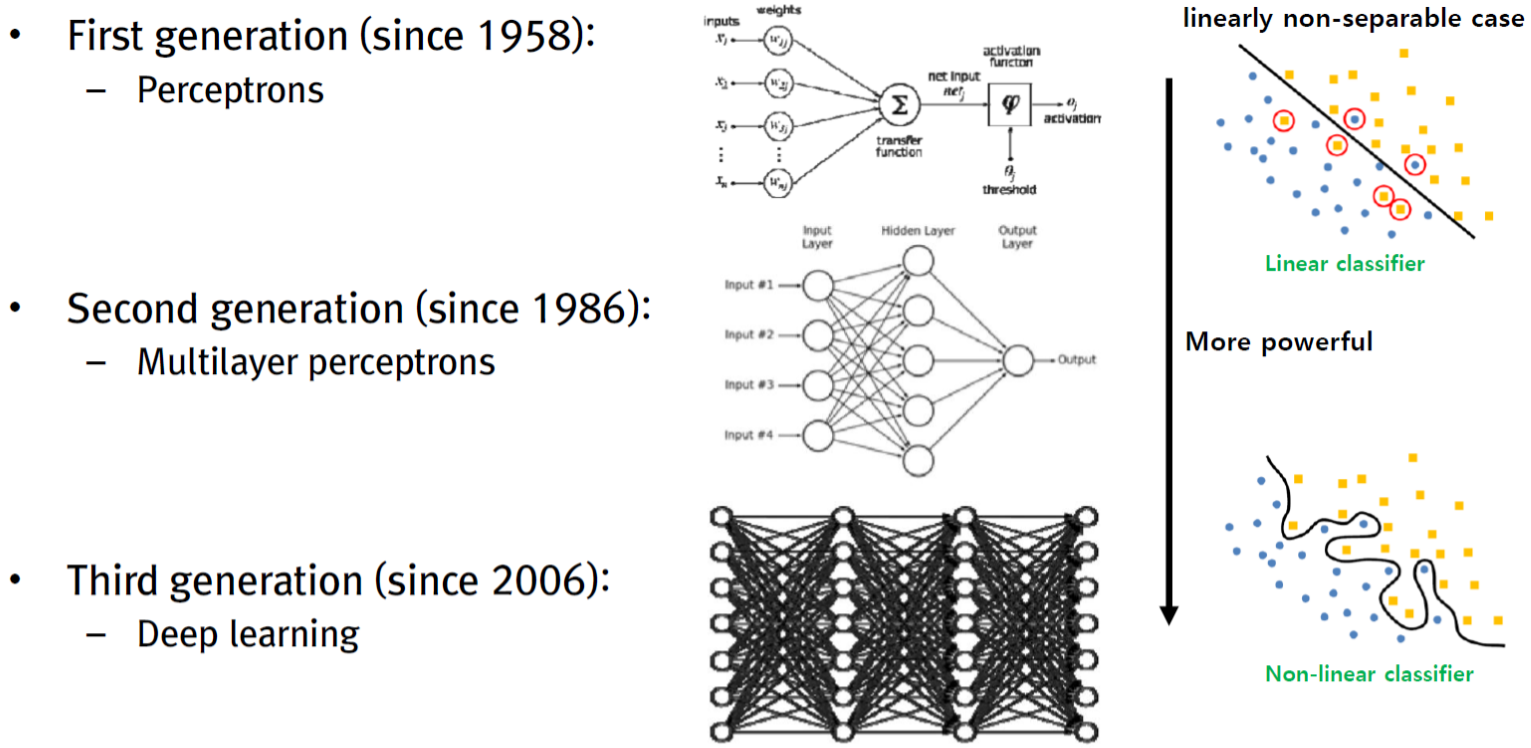

In [4]:
im #Neural Network History

### Biological motivation and connections

- 뇌의 기본 계산적 단위 뉴런(neuron)
- 약 10^14 – 14^15개의 시냅스(synapses)
- 뉴런은 수상돌기(dendrites)으로부터 입력 신호를 받고 축색 돌기(axon)에 출력 신호들을 만듦. 시냅스 강도에 기반하여 다른 뉴런의 수상돌기와 곱해져 상호작용함.

<img src="http://cfile2.uf.tistory.com/image/256DA34256E1672C15B393">

In [5]:
class Neuron(object):
  # ... 
  def forward(inputs):
    """ 입력들과 가중치들은 1차원의 numpy 배열이고, 바이어스는 숫자로 가정한다"""
    cell_body_sum = np.sum(inputs * self.weights) + self.bias
    firing_rate = 1.0 / (1.0 + math.exp(-cell_body_sum)) # 시그모이드 활성 함수
    return firing_rate

### 활성함수(Activation Function)
[1] 시그모이드(Sigmoid). 
- 시그모이드 비선형성은 수리적 형태 σ(x) = 1/ (1+ e^-x) (범위 0~1) 매우큰 음수는 0이되고 매우큰 양수는 1이 됨. 뉴런이 활성될 때 0이나 1의 꼬리에서 포화됨. 그라이언트(기울기) 거의 0이 되버림.vanishing gradient problem(지역 최소값 머무르게 되는 원인) 출력이 0이 중심되지 않음. 그라이언트는 전부 양이거나 전부 음이거나

[2] 쌍곡탄젠트(Tanh)
- 실제 갑의 범위를 -1에서 1로 늘림. 출력이 0이 중심. 시그모이드와 같은 vanishing gradient problem

[3] ReLU(Rectified Linear Unit) f(x) = max(0,x)
- 시그모이드/쌍곡탄젠트 함수와 비교해서 수렴하는데 빠른 가속도가 있음(선형성) 포화되지 않음. 입력값이 0보다 작을 때 출력밧도 0, 미분값도 0. 덕분에 vanihing gradient problem을 해결할 수 있지만 필요한 정보를 잃을수도 있음. ReLU가 죽는 문제를 해결하기 위해 Leaky ReLU과 같은 방법이 나왔음. 

<img src="http://cfile25.uf.tistory.com/image/212C443F56E172C81B6E69">
<img src="http://cfile29.uf.tistory.com/image/2529043F56E172CA1D6AF6">
<img src="http://cfile25.uf.tistory.com/image/251F493856E17D5132E2D3">

### 신경망 아키텍쳐(Neural Network architectures)
- 그래프에서 뉴런은 비순환적인 그래프에서 뉴런들의 집합. 일반적인 레이어 형태는 두 인접 레이어들 사이에 뉴런들의 완전히 쌍대 연결된 완전연결 레이어(fully-connected layer)

<img src="http://cfile25.uf.tistory.com/image/2175203656E185AB035FEE">
<img src="http://cfile23.uf.tistory.com/image/226A103656E185AB0F5587">

###피드포워드 계산 예제(Example feed-forward computation)
####활성 함수를 갖는 반복적인 행렬 곱셈(Repeated matrix multiplications interwoven with activation function). 

### 3-레이어 신경망의 forward-pass:
```
f= lambda x: 1.0/(1.0 + np.exp(-x)) # 활성 함수(시그모이드 사용)
x = np.random.randn(3, 1) # 3개의 숫자를 갖는 무작위 입력 벡터(3x1)
h1 = f(np.dot(W1, x) + b1) # 첫번째 은닉 층의 활성화를 계산 (4x1)
h2 = f(np.dot(W2, h1) + b2) # 두번째 은닉 층의 활성화를 계산(4x1)
out = np.dot(W3, h2) + b3 # 출력 뉴런 (1x1)
```

### 레이어의 수와 크기 설정하기(Setting number of layers and their sizes)

예) 2차원에서 이항분류기 문제가 있다고 가정. 3개의 다른 신경망을 학습할 수 있음. 각각 하나의 은닉층의 크기 다름.

<img src="http://cfile25.uf.tistory.com/image/27453C3656E28DAC0AEF2D">

ConvNetJS Demo : http://cs.stanford.edu/people/karpathy/convnetjs/demo/classify2d.html

과적합(overfitting) 
모델이 복잡할수록 학습 자료에는 적합하지만 테스트 집합에는 일반화되지 않음. 
과적합을 피하기 위해 L2 정규화, dropout 입력 노이즈를 통해 통제함. dropout : 학습 데이터에 대해 무작위로 50%의 은닉 노드를 제거한채로 학습시킴, L2 정규화 : 파라미터에 제한을 거는 것. 벌점화. 

<img src="http://cfile8.uf.tistory.com/image/242A0F4456E29224035DA3">

L1 regularization on least squares:
<img src="http://www.chioka.in/wp-content/uploads/2013/12/least_squares_l11.png"> 

- 각 가중치 w는 목적함수에 λ|w|로 더해진다
- L1 정규화와 L2 정규화를 섞어서 사용할 수 있다. λ1|w| + λ2w^2 (이것을 Elastic net regularization이라 부른다)
- L1 정규화는 최적화 동안 가중치 벡터들이 희소해지는 것을 이끄는 흥미로운 특성이 있다 (i.e. 정확히 0에 매우 가까워진다). 즉, L1 정규화를 가진 뉴런들은 결국 그들의 가장 중요한 입력변수들의 희소 부분집합을 사용하고, "noisy" 입력변수들에 거의 변하지 않게 된다.

L2 regularization on least squares:
<img src="http://www.chioka.in/wp-content/uploads/2013/12/least_squares_l2.png">

- 네트워크에서 모든 가중치에 대해, 우리는 1/2 λ w^2 를 목적함수에 더한다(λ는 정규화 강도)
- L2 정규화는 직관적으로 값이 큰 가중치 벡터들에게 제약을 주는 것


In [12]:
X = np.array([ [0,0,1],[0,1,1],[1,0,1],[1,1,1] ])
y = np.array([[0,1,1,0]]).T

In [13]:
X

array([[0, 0, 1],
       [0, 1, 1],
       [1, 0, 1],
       [1, 1, 1]])

In [15]:
y

array([[0],
       [1],
       [1],
       [0]])

In [16]:
alpha,hidden_dim,dropout_percent,do_dropout = (0.5,4,0.2,True)

In [17]:
synapse_0 = 2*np.random.random((3,hidden_dim)) - 1
synapse_1 = 2*np.random.random((hidden_dim,1)) - 1

In [18]:
synapse_0

array([[-0.20755129,  0.91189844,  0.99476871, -0.16371123],
       [-0.04769784,  0.95741855, -0.00352977, -0.22733522],
       [-0.01857102, -0.58750728, -0.71339113, -0.32258982]])

In [19]:
synapse_1

array([[-0.51498785],
       [-0.26549213],
       [ 0.42812075],
       [ 0.53314453]])

In [21]:
for j in xrange(60000):
    layer_1 = (1/(1+np.exp(-(np.dot(X,synapse_0)))))
    if(do_dropout):
        layer_1 *= np.random.binomial([np.ones((len(X),hidden_dim))],1-dropout_percent)[0] * (1.0/(1-dropout_percent)) ##Dropout 방법
    layer_2 = 1/(1+np.exp(-(np.dot(layer_1,synapse_1))))
    layer_2_delta = (layer_2 - y)*(layer_2*(1-layer_2))
    layer_1_delta = layer_2_delta.dot(synapse_1.T) * (layer_1 * (1-layer_1))
    synapse_1 -= (alpha * layer_1.T.dot(layer_2_delta))
    synapse_0 -= (alpha * X.T.dot(layer_1_delta))

In [25]:
layer_1

array([[  1.25000000e+00,   2.36917193e-07,   0.00000000e+00,
          7.43510583e-01],
       [  1.12459166e+00,   0.00000000e+00,   4.11308107e-08,
          5.98997274e-05],
       [  0.00000000e+00,   1.31486466e-03,   0.00000000e+00,
          0.00000000e+00],
       [  9.10115440e-28,   6.43869391e-01,   1.57284320e-04,
          9.99892234e-09]])

In [26]:
layer_2

array([[ 0.00646077],
       [ 0.88216025],
       [ 0.49747527],
       [ 0.00707326]])

In [27]:
synapse_1
synapse_0

array([[ -64.68072507,    8.62199609,    8.24917868,   -8.69799782],
       [-183.78802784,    6.9165568 ,   -9.18330184,  -10.3298174 ],
       [ 185.97856635,  -15.47928829,   -8.04635007,    0.38391467]])

<img src="http://www.kdnuggets.com/wp-content/uploads/drop-out-in-neural-networks.jpg">

### Gradient descent optimization
<img src ="http://www.aistudy.com/math/images/%EA%B5%AD%EB%B6%80%EC%A0%81%EC%B5%9C%EC%A0%81%EA%B0%92.gif">
- E(w) = loss function (output 형태에 따라 다름), sum-of-squared error, entropy error function... 
- 𝑤∗=argmin𝑤𝐸(𝑤) / 𝑤𝜏+1=𝑤𝜏−𝛼⋅∇E(𝑤𝜏) / 𝛼 : learning rate
- Stochastic gradient descent (SGD) : SGD makes an update to the weight vector based on one data pointat a time // 𝑤𝜏+1=𝑤𝜏−𝛼⋅∇𝐸𝑛(𝑤𝜏) 
- Error Backpropagation : 𝑤𝜏+1=𝑤𝜏−𝛼⋅∇𝐸𝑛(𝑤𝜏)
- ∇𝐸𝑛(𝑤𝜏) = 𝜕𝐸𝑛/𝜕𝑤𝑗𝑖
<img src="https://upload.wikimedia.org/math/e/3/f/e3f0cfdaae2b1ade04cb7dcd50453b91.png">

- https://en.wikipedia.org/wiki/Delta_rule 
- https://www.quora.com/Whats-the-difference-between-gradient-descent-and-stochastic-gradient-descent

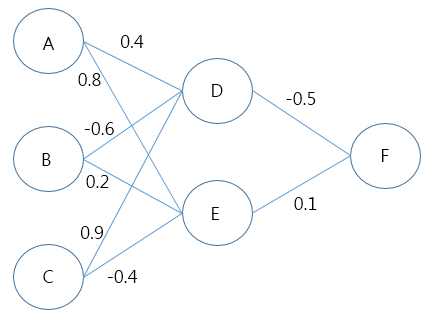

In [28]:
nn1 = Image.open('nn1.png')
nn1

0110으로 학습할 경우 (x 0,1,1 y 0) learning rate 0.5


> Input D 
= I1 * Wad + I2 * Wbd + I3 * Wcd
= (0 곱하기 0.4)+(1 곱하기 -0.6)+(1 곱하기 0.9) =  0.3

> Input E 
= I1 * Wae + I2 * Wbe + I3 * Wce
= (0 곱하기 0.8)+(1 곱하기 0.2)+(1 곱하기 -0.4) = -0.2

> OutputD = 1 / (1+e-inputd) = 1 / (1+e-0.3) = 0.57
> OutputE = 1 / (1+e-inpute) = 1 / (1+e0.2) = 0.45

> InputF 
= OutputD * Wdf + OutputE * Wef
= (0.57 곱하기 -0.5) + (0.45 곱하기 0.1) = -0.24

> OutputF 
= 1 / 1+ e-InputF) = 1 / 1 + e0.24 = 0.44

> ErrorF
= OutputF(1-OutputF)(ActualF-OutputF)
= 0.44 (1 - 0.44) (0- 0.44) = -0.108

> ErrorD
= OutputD(1-OutputD)(ErrorF * Wdf)
= 0.57(1-0.57)(-0.108 곱하기 -0.5) = 0.013

> ErrorE 
= OutputE(1-OutputE)(ErrorF * Wef)
= 0.45(1-0.45)(-0.108 곱하기 0.1) = -0.003

> 
Wij = Wij + l * Errorj 곱하기 Outputi
- Wad = 0.4 + 0.5 곱하기 0.013 곱하기 0 = 0.4
- Wae = 0.8 + 0.5 곱하기 -0.003 곱하기 0 = 0.8
- Wbd = -0.6 + 0.5 곱하기 0.013 곱하기 1 = -0.594
...

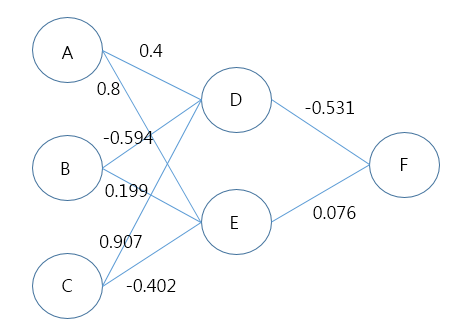

In [29]:
nn2 = Image.open('nn2.png')
nn2